### Estratégias de Marketing para Atacadistas usando IA

As empresas no ramo atacadista conhecem bem o dilema da competição: preços baixos, vários concorrentes e clientes às vezes infiéis. Desta forma, estas empresas precisam se destacar usando estratégias de marketing que segmentem o mercado consumidor, prevejam a demanda e criem diferenciação frente à concorrência. 

Usando inteligência artificial e algoritmos de machine learning, podemos criar modelos que ajudem na identificação dos melhores clientes e orientem os recursos destinados aos canais de marketing, além de prever picos de estoque e vendas. 
O marketing é fundamental para toda empresa e quando usado corretamente pode aumentar a força da marca, melhorar o relacionamento com os clientes e reduzir a necessidade de impor preços baixos para manter o negócio. 

Neste artigo, iremos demonstrar um case de análise de uma empresa do mercado atacadista, baseada em Portugal. Os dados são reais e podem ser acessados no repositório: [UCI Wholesale Customers](https://archive.ics.uci.edu/ml/datasets/wholesale+customers)

In [1]:
import numpy as np #biblioteca utilizada para trabalhar com vetores
import pandas as pd #biblioteca para trabalhar com dataframes
import seaborn as sns #biblioteca utilizada para criar gráficos
import matplotlib.pyplot as plt #biblioteca para criar gráficos "comuns" ao estilo Matlab

In [2]:
# abrir o arquivo csv que contém os dados a serem utilizados durante a prática
uci_customers = pd.read_csv('/content/Wholesale customers data.csv')

In [3]:
#visualizando as 5 primeiras linhas do banco de dados
uci_customers.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

1. FRESH: total anual gasto em produtos frescos;
2. MILK: total anual gasto em produtos derivados do leite;
3. GROCERY: total anual gasto em produtos de supermercado;
4. FROZEN: total anual gasto em produtos congelados;
5. DETERGENTS_PAPER: total anual gasto em produtos de limpeza;
6. DELICATESSEN: total anual gasto em produtos de delicatessen;
7. CHANNEL: tipo do canal de comunicação com o consumidor (1- Horeca(hotel/restaurante/cafés) 2- varejo)
8. REGION: região do consumidor

In [4]:
#conhecendo o "formato" dos dados
uci_customers.info() #função para "ver" as variáveis presentes no dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
#analisando o banco de dados
uci_customers.describe() #função que retorna uma análise superficial dos dados 

Channel      Region  ...  Detergents_Paper    Delicassen
count  440.000000  440.000000  ...        440.000000    440.000000
mean     1.322727    2.543182  ...       2881.493182   1524.870455
std      0.468052    0.774272  ...       4767.854448   2820.105937
min      1.000000    1.000000  ...          3.000000      3.000000
25%      1.000000    2.000000  ...        256.750000    408.250000
50%      1.000000    3.000000  ...        816.500000    965.500000
75%      2.000000    3.000000  ...       3922.000000   1820.250000
max      2.000000    3.000000  ...      40827.000000  47943.000000

[8 rows x 8 columns]

**Verificando se existem outliers (anomalias) nos dados. Para isso, será utilizado o boxplot.**

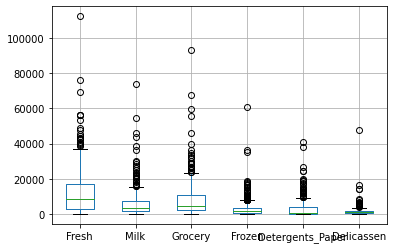

In [6]:
boxplot = uci_customers.boxplot(column=['Fresh', 'Milk','Grocery','Frozen','Detergents_Paper','Delicassen'])  #constroi o boxplot para as colunas desejadas

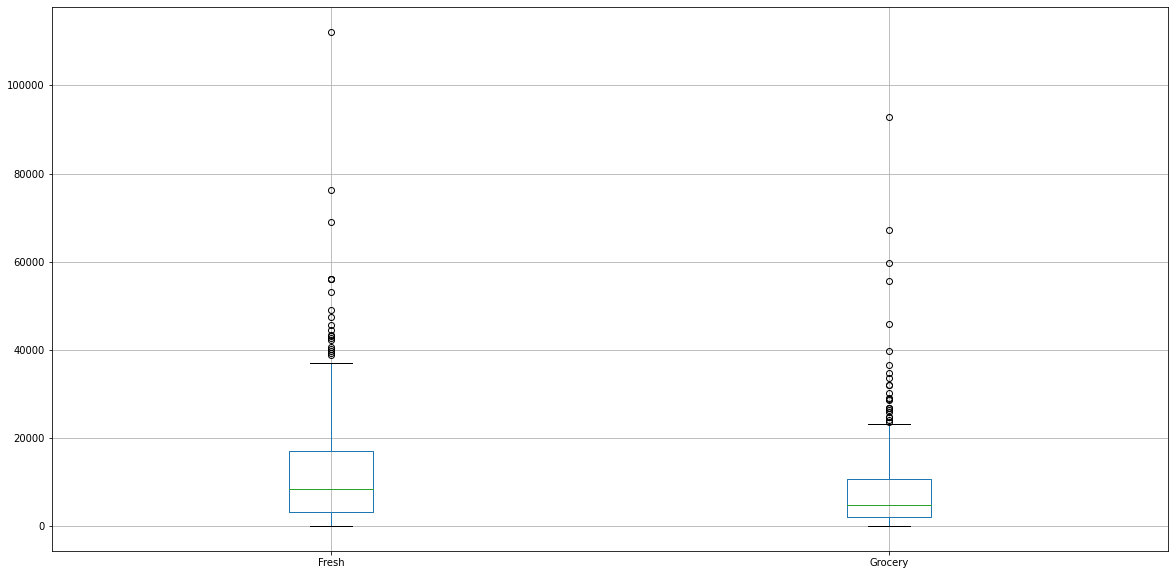

In [7]:
plt.figure(figsize=(20,10))
uci_customers.boxplot(column=['Fresh','Grocery'])  #constroi o boxplot para o total gasto em alimentos frescos e de supermercado

**Explorando os dados. Entendendo alguns relacionamentos e comportamentos dos clientes.**

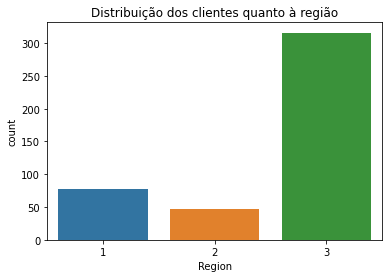

In [8]:
#analisando a distribuição dos clientes por gênero
sns.countplot(x='Region', data=uci_customers); # cria o gráfico que conta a quantidade de consumidores existente em cada uma das regiões
plt.title('Distribuição dos clientes quanto à região');  #adiciona o título no gráfico

**Distribuição dos consumidores pelo gasto com produtos derivados do leite**

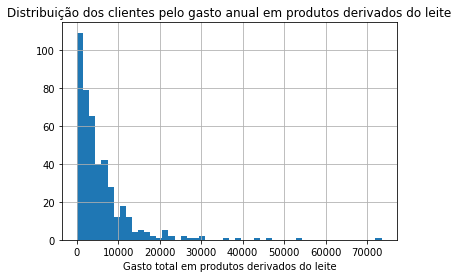

In [9]:
#analisando a distribuição dos clientes quanto ao total de gastos com produtos derivados do leite através do histograma
uci_customers.hist('Milk', bins=50);  #seleciona a coluna de total de gastos para realizar o histograma
                                 # os "bins" indicam a quantidade de grupos que se deseja dividir os dados
plt.title('Distribuição dos clientes pelo gasto anual em produtos derivados do leite');# adiciona o título ao gráfico (histograma)
plt.xlabel('Gasto total em produtos derivados do leite');

**Comparando o canal de comunicação **

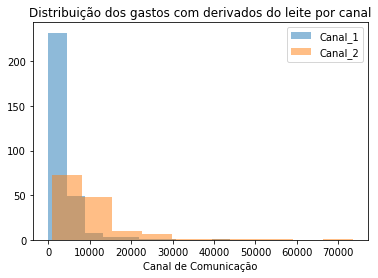

In [10]:
canal_1=uci_customers[uci_customers['Channel']==1] #seleciona o canal 1
canal_2= uci_customers[uci_customers['Channel']==2] #seleciona a comunicação pelo canal 2
plt.hist('Milk', data=canal_1, alpha=0.5, label='Canal_1'); #cria o histograma apenas do canal 1
plt.hist('Milk', data=canal_2, alpha=0.5, label='Canal_2'); #cria o histograma apenas para o canal 2
plt.title('Distribuição dos gastos com derivados do leite por canal'); #adicionao título ao gráfico
plt.xlabel('Canal de Comunicação'); # adiciona o label para o eixo x
plt.legend(); #adiciona a legenda

**Analisando os gastos anuais com supermercado.**

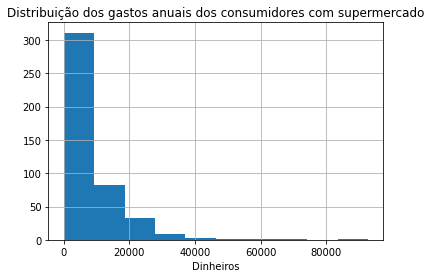

In [11]:
uci_customers.hist('Grocery');  #criando um histograma para os os gastos totais dos consumidores com produtos de supermercado
plt.title('Distribuição dos gastos anuais dos consumidores com supermercado'); #adiciona o título no gráfico
plt.xlabel('Dinheiros'); # adiciona o label do eixo X

In [12]:
uci_customers[uci_customers['Region']==3].nunique()

Channel               2
Region                1
Fresh               314
Milk                309
Grocery             312
Frozen              307
Detergents_Paper    304
Delicassen          296
dtype: int64

**Analisando o impacto da região nos gastos com supermercado.**

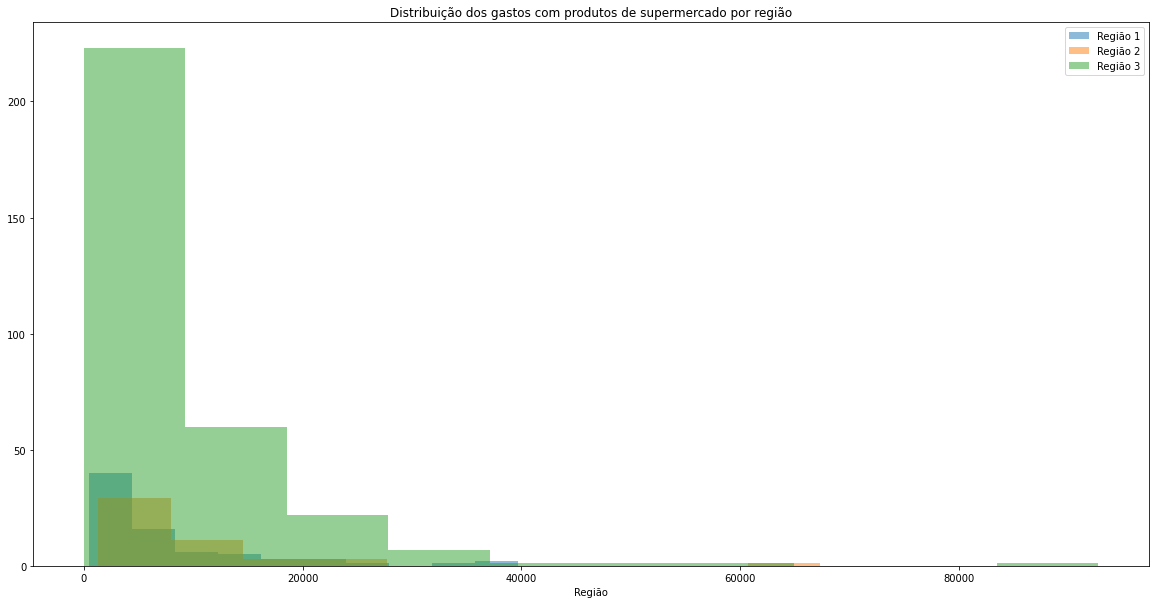

In [13]:
plt.figure(figsize=(20,10))


regiao_1=uci_customers[uci_customers['Region'] == 1]
regiao_2=uci_customers[uci_customers['Region'] == 2]
regiao_3=uci_customers[uci_customers['Region'] == 3]

plt.hist('Grocery', data=regiao_1, alpha=0.5, label='Região 1');
plt.hist('Grocery', data=regiao_2, alpha=0.5, label='Região 2');
plt.hist('Grocery', data=regiao_3, alpha=0.5, label='Região 3');

plt.title('Distribuição dos gastos com produtos de supermercado por região');
plt.xlabel('Região');
plt.legend();

** Comparando os valores gastos com supermercado por cada região**

In [14]:
#obtém os dados de cada um dos consumidores em cada região
regiao_1=uci_customers[uci_customers['Region'] == 1]
regiao_2=uci_customers[uci_customers['Region'] == 2]
regiao_3=uci_customers[uci_customers['Region'] == 3]

# obtém os valores médios atribuídos a cada uma das regiões
print('Valor anual médio gasto pelos clientes da região 1: ',regiao_1[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].mean()) #imprime o valor médio para a região 1
print('Valor anual médio gasto pelos clientes da região 2: ',regiao_2[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].mean()) #imprime o valor médio para a região 2
print('Valor anual médio gasto pelos clientes da região 3: ',regiao_3[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].mean()) #imprime o valor médio para a região 3



Valor anual médio gasto pelos clientes da região 1:  Fresh               11101.727273
Milk                 5486.415584
Grocery              7403.077922
Frozen               3000.337662
Detergents_Paper     2651.116883
Delicassen           1354.896104
dtype: float64
Valor anual médio gasto pelos clientes da região 2:  Fresh               9887.680851
Milk                5088.170213
Grocery             9218.595745
Frozen              4045.361702
Detergents_Paper    3687.468085
Delicassen          1159.702128
dtype: float64
Valor anual médio gasto pelos clientes da região 3:  Fresh               12533.471519
Milk                 5977.085443
Grocery              7896.363924
Frozen               2944.594937
Detergents_Paper     2817.753165
Delicassen           1620.601266
dtype: float64


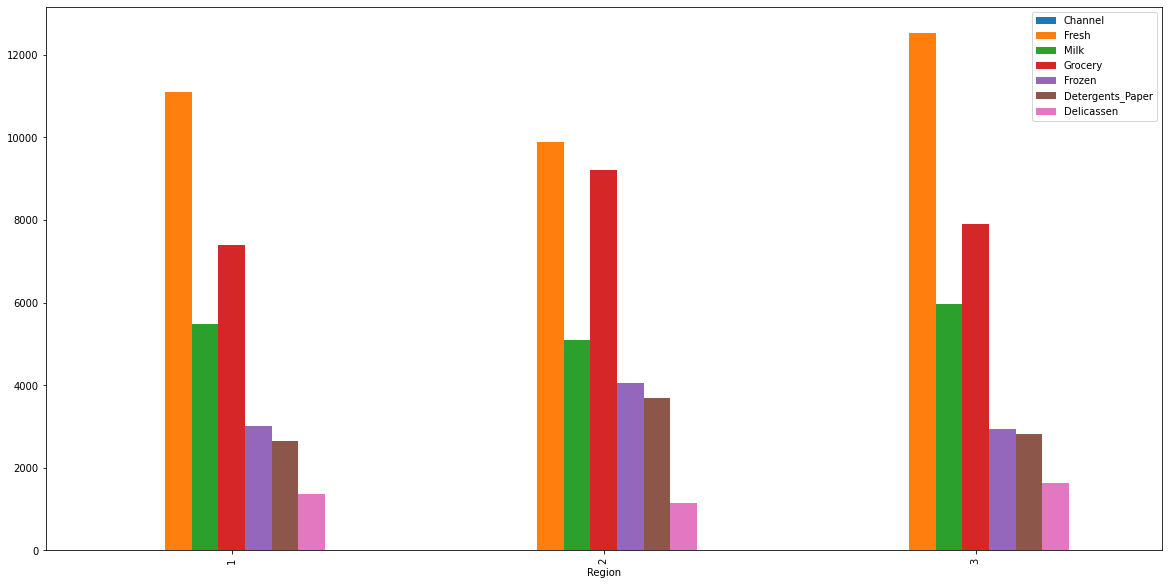

In [15]:
df_customers_mean=uci_customers.groupby('Region').mean() #agrupa por região e obtém os valores médios
df_customers_mean.plot(kind='bar',figsize=(20,10))  #realiza o plot 

**Encontrando o valor gasto com Delicassen e Supermercado pela região**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


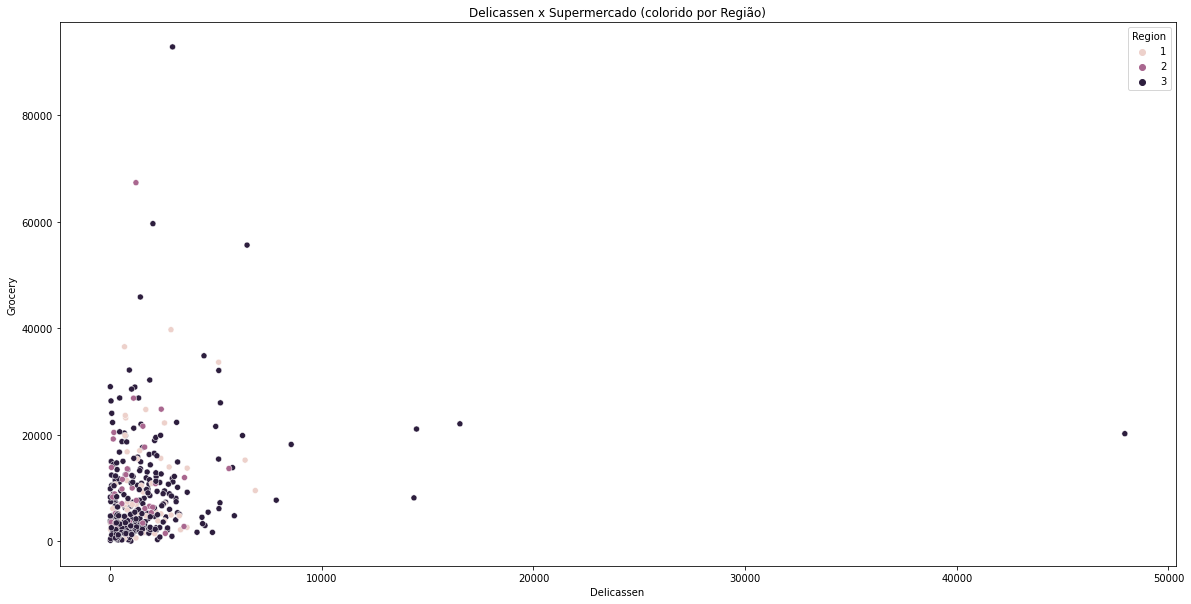

In [16]:
plt.figure(figsize=(20,10))

sns.scatterplot('Delicassen', 'Grocery', hue='Region', data=uci_customers); #realiza o plot do gráfico dos gastos em supermercado com o 
plt.title('Delicassen x Supermercado (colorido por Região)'); #adiciona o título ao gráfico

** Analisando a correlação entre as variáveis **

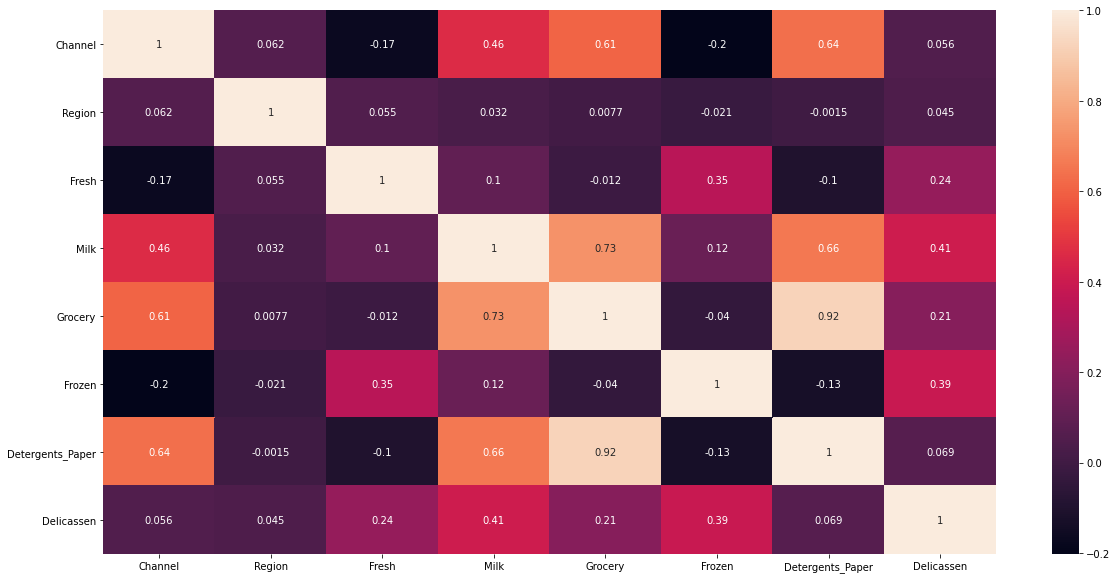

In [17]:
plt.figure(figsize=(20,10))

sns.heatmap(uci_customers.corr(), annot=True) # desenha a matriz de correlação entre cada um dos dados 

** Analisando a correlação entre os Gastos com Detergente e Papel com as Compras de Produtos de Supermercado **

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


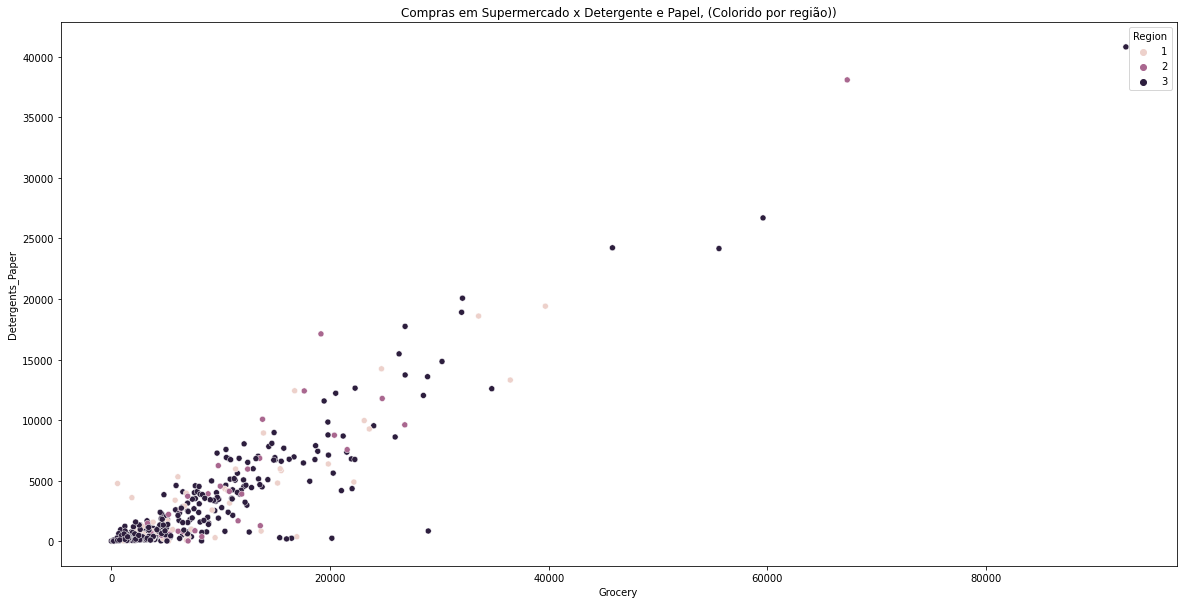

In [18]:
plt.figure(figsize=(20,10))


sns.scatterplot('Grocery', 'Detergents_Paper', hue='Region', data=uci_customers);  #realiza o plot do gráfico de dispersão 
plt.title('Compras em Supermercado x Detergente e Papel, (Colorido por região))'); #adiciona o título ao gráfico

** Aplicando a regressão linear **

In [19]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [20]:
X = uci_customers['Grocery'].values.reshape(-1,1)
y = uci_customers['Delicassen'].values.reshape(-1,1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #dividindo o df em treinamento e teste

In [22]:
regressor = LinearRegression() #objeto para a construção do medelo de regressão linear 
regressor.fit(X_train, y_train) #treinamento do algoritmo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

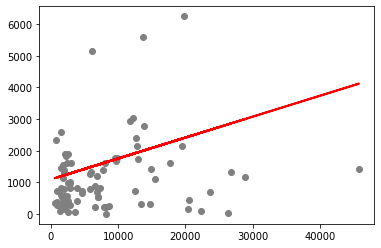

In [23]:
y_pred = regressor.predict(X_test)  #previsão do modelo de regressão
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

** Analisando a correlação entre o gasto com Produtos congelados e produtos de higiene**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


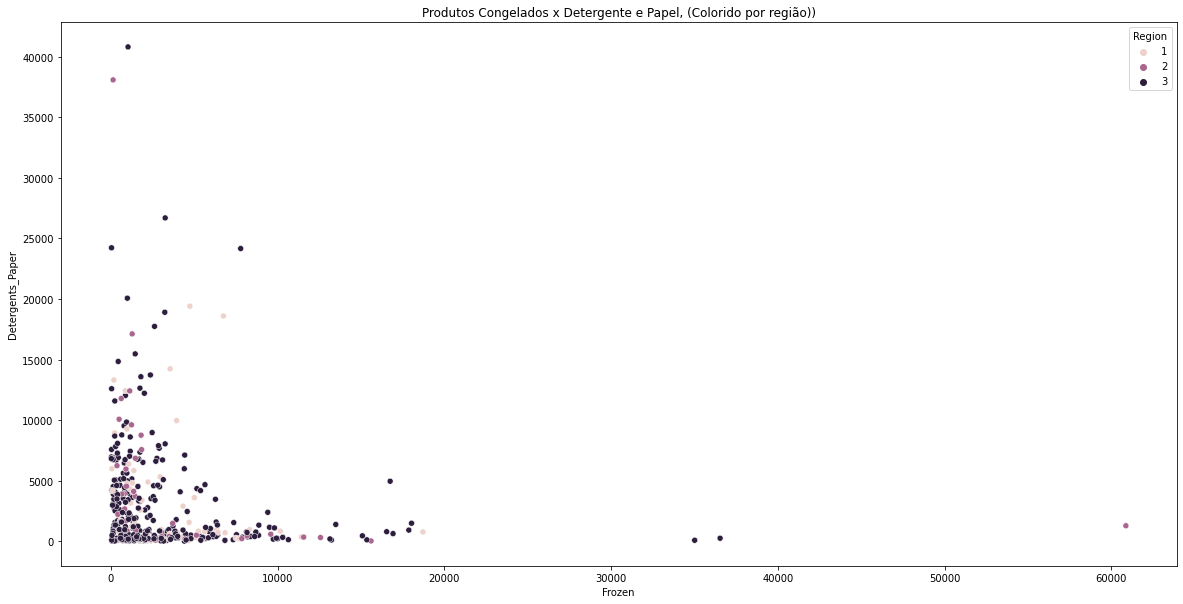

In [24]:
plt.figure(figsize=(20,10))


sns.scatterplot('Frozen', 'Detergents_Paper', hue='Region', data=uci_customers);  #realiza o plot do gráfico de dispersão 
plt.title('Produtos Congelados x Detergente e Papel, (Colorido por região))'); #adiciona o título ao gráfico

** Correlações por região **

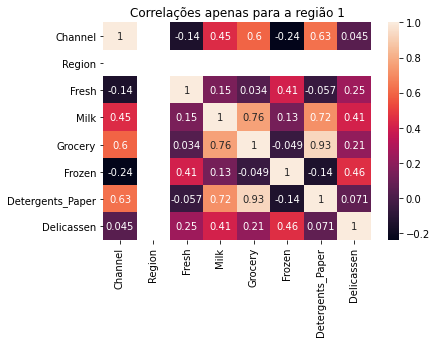

In [25]:
#região 1 - Lisboa
sns.heatmap(regiao_3.corr(), annot=True); #encontra a matriz de correlação apenas entre o gênero feminino
plt.title('Correlações apenas para a região 1'); #adiciona o título no gráfico

**Segmentação de clientes utilizando compras no supermercado e produtos de limpeza.**

In [26]:
#biblioteca para realizar a construção do algoritmo não supervisionado K-means
from sklearn.cluster import KMeans

In [27]:
#obtém os dados para a construção do banco de dados apenas com compras de congelados e produtos de limpeza
segmentacao_1 = uci_customers[['Frozen' , 'Detergents_Paper']].iloc[: , :].values #transforma os dados em array


In [28]:
kmeans = KMeans(n_clusters=3) #contrói o modelo para aplicar o algoritmo de clusterização não supervisionado K-means
kmeans.fit(segmentacao_1) #aplica o modelo K-means aos dados
y_kmeans = kmeans.predict(segmentacao_1) #encontra os grupos

Text(0.5, 1.0, 'Segmentação de clientes por gastos com  Produtos de supermercado x Produtos de limpeza')

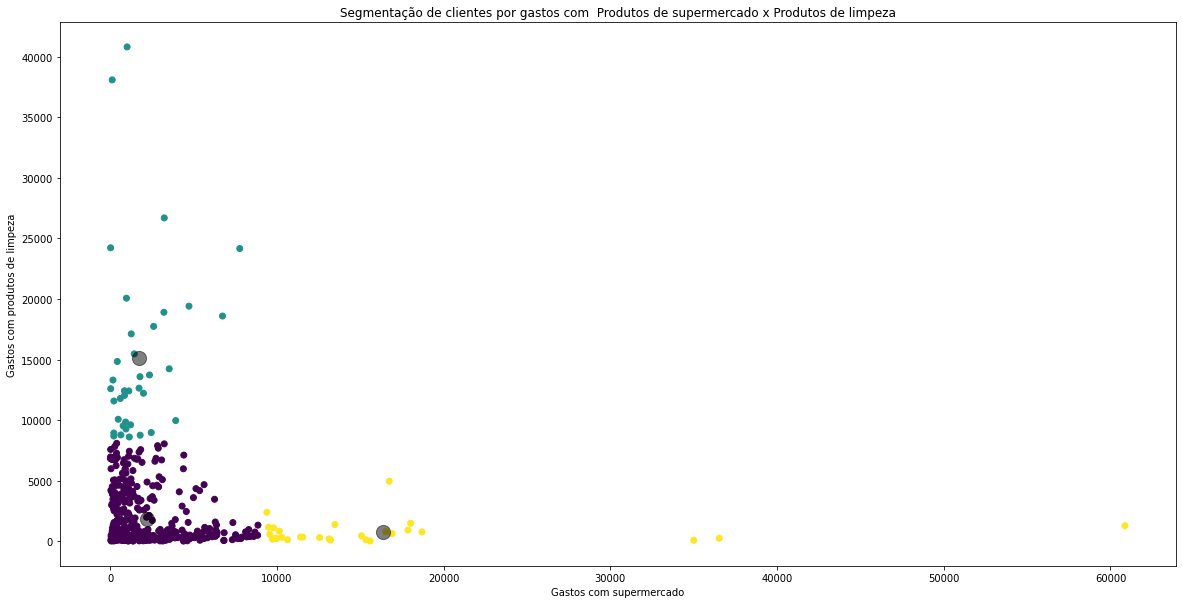

In [29]:
#inicia a construção da figura
plt.figure(figsize = (20 , 10) ) #define o tamanho da figura

plt.scatter(segmentacao_1[:, 0], segmentacao_1[:, 1], c=y_kmeans, cmap='viridis') #constrói o gráfco de dispersão com os grupos
centers = kmeans.cluster_centers_ #encontra os centros de cada um dos grupos
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) #realiza o plot de cada um dos grupos
plt.xlabel("Gastos com supermercado")  #adiciona o label para o eixo X
plt.ylabel("Gastos com produtos de limpeza") #adiciona o label para o eixo Y
plt.title("Segmentação de clientes por gastos com  Produtos de supermercado x Produtos de limpeza") #adiciona o título

Apêndice: Análise exploratória usando o Profile

In [30]:
!pip install -U pandas-profiling

from pandas_profiling import ProfileReport




     |████████████████████████████████| 256kB 12.6MB/s 
     |████████████████████████████████| 645kB 26.6MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 10.1MB 45.4MB/s 
     |████████████████████████████████| 112kB 51.5MB/s 
     |████████████████████████████████| 3.1MB 31.1MB/s 
     |████████████████████████████████| 1.1MB 36.7MB/s 
     |████████████████████████████████| 81kB 8.7MB/s 
     |████████████████████████████████| 296kB 41.6MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=0e43ecbac7e150950ee9414b0aac4ddb8d8f876d65ccbb0753b2841175b44f45
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=2bbb47a8f1b01f53609f0960fbb457732fda777fc828e8492781b1b7c6c6a08d
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075

In [31]:
df = uci_customers
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [32]:
profile = ProfileReport(df, title='Análise Exploratória do Dataset')
profile

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]